# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

In [2]:
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 582


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [5]:
# Define an empty list to fetch the weather data for each city
city_data = []

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    try:
        # Group cities in sets of 50 for logging purposes
        if (i % 50 == 0 and i >= 50):
            set_count += 1
            record_count = 0

        # Create endpoint URL with each city
        response = requests.get(query_url + city).json()

        city_weather_dict = {
            "city": city,
            "latitude": response["coord"]["lat"],
            "longitude": response["coord"]["lon"],
            "max temp": response["main"]["temp_max"],
            "city humidity": response["main"]["humidity"],
            "cloudiness": response["clouds"]["all"],
            "wind speed": response["wind"]["speed"],
            "country": response["sys"]["country"],
            "date": response["dt"]
        }

        # Append city weather info to the city_data list
        city_data.append(city_weather_dict)

        # Log the processing of each city
        print(f"Processing Record {i+1} | {city}")

    except Exception as e:
        print(f"Error processing {city}: {e}")
        print("City not found. Skipping...")

# Convert the cities weather dictionary into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
print(city_data_df.count())

Processing Record 1 | adamstown
Processing Record 2 | puerto natales
Processing Record 3 | college
Processing Record 4 | pali
Processing Record 5 | kristiansund
Processing Record 6 | santa maria
Processing Record 7 | marka
Processing Record 8 | menaka
Processing Record 9 | pawni
Processing Record 10 | uzgen
Processing Record 11 | hermanus
Processing Record 12 | ribeira grande
Processing Record 13 | alice springs
Processing Record 14 | saipan
Processing Record 15 | adrar
Processing Record 16 | mchinji
Processing Record 17 | kolonia
Processing Record 18 | arteche
Processing Record 19 | talnakh
Processing Record 20 | thompson
Processing Record 21 | bilibino
Processing Record 22 | arenapolis
Processing Record 23 | invercargill
Processing Record 24 | rio grande
Processing Record 25 | wailua homesteads
Processing Record 26 | waitangi
Error processing hayma': 'coord'
City not found. Skipping...
Processing Record 28 | bayganin
Processing Record 29 | constitucion
Processing Record 30 | la'ie
Pr

In [6]:
# Log the processing of each city
print(f"Processing Record {i+1} | {city}")

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Processing Record 582 | birjand
-----------------------------
Data Retrieval Complete
-----------------------------


In [7]:
# Display sample data
city_data_df

,city,latitude,longitude,max temp,city humidity,cloudiness,wind speed,country,date
0,adamstown,-25.0660,-130.1015,77.31,82,100,13.76,PN,1710362300
1,puerto natales,-51.7236,-72.4875,48.65,61,75,21.85,CL,1710362301
2,college,64.8569,-147.8028,4.17,55,40,1.99,US,1710362301
3,pali,25.7667,73.3333,68.52,35,0,4.52,IN,1710362301
4,kristiansund,63.1115,7.7320,44.65,87,75,12.66,NO,1710362302
...,...,...,...,...,...,...,...,...,...
540,alto araguaia,-17.3147,-53.2153,79.88,71,100,3.27,BR,1710362456
541,kurumkan,54.3000,110.3000,16.12,92,92,5.01,RU,1710362456
542,mount darwin,-16.7725,31.5838,67.19,92,100,2.80,ZW,1710362456
543,balotra,25.8333,72.2333,71.78,34,0,0.78,IN,1710362456


In [31]:
import os

# Define the directory path
output_dir = "../WeatherPy/output_data"

# Save the DataFrame to a CSV file
city_data_df.to_csv(os.path.join(output_dir, "my_cities.csv"), index_label="City_ID")

In [32]:
# Read saved data
city_data_df = pd.read_csv("output_data/my_cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,city,latitude,longitude,max temp,city humidity,cloudiness,wind speed,country,date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,77.31,82,100,13.76,PN,1710362300
1,puerto natales,-51.7236,-72.4875,48.65,61,75,21.85,CL,1710362301
2,college,64.8569,-147.8028,4.17,55,40,1.99,US,1710362301
3,pali,25.7667,73.3333,68.52,35,0,4.52,IN,1710362301
4,kristiansund,63.1115,7.7320,44.65,87,75,12.66,NO,1710362302


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

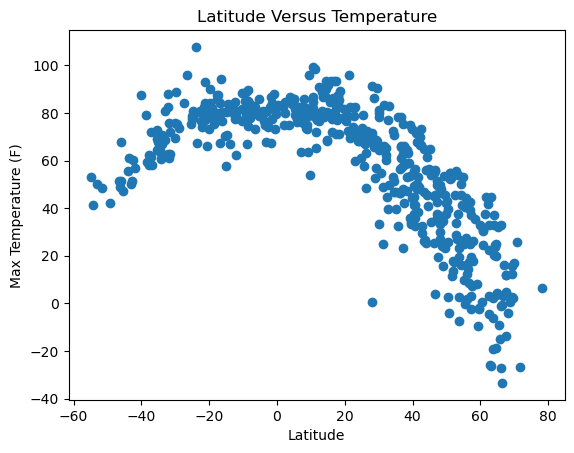

In [33]:
# Build scatter plot for latitude vs. temperature

x_values = city_data_df['latitude']
y_values = city_data_df['max temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title("Latitude Versus Temperature")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

In [ ]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['latitude']
y_values = city_data_df['city humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('City Humidity (%)')
plt.title("Latitude Versus Humidity")

# Show plot
plt.show()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

In [ ]:
# Build the scatter plot for latitude vs. cloudiness
x_values = city_data_df['latitude']
y_values = city_data_df['cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Latitude Versus Cloudiness")

# Show plot
plt.show()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

In [ ]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['latitude']
y_values = city_data_df['wind speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed)')
plt.title("Latitude Versus Wind Speed")


# Show plot
plt.show()
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


###  Latitude vs. Temperature Linear Regression Plot

R-squared: 0.729


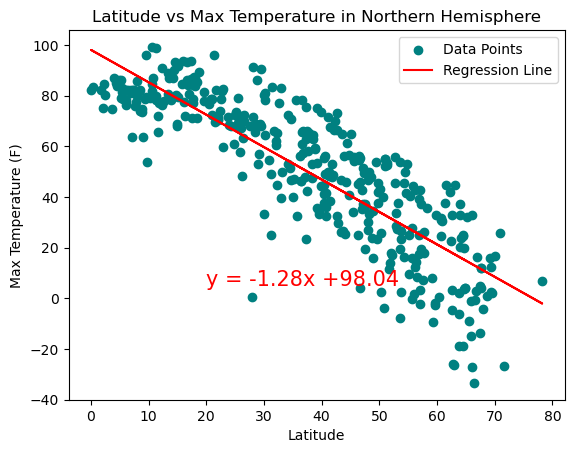

In [19]:
# Define Northern and Southern Hemispheres
northern_hem_df = city_data_df.loc[city_data_df['latitude'] >= 0]
southern_hem_df = city_data_df.loc[city_data_df['latitude'] < 0]

# Regress latitude and max temp for Northern Hemisphere
x_values = northern_hem_df['latitude']
y_values = northern_hem_df['max temp']
(slope, intercept, rvalue, pvalue,stderr) = linregress(x_values, y_values)

# Get regression values 
regress_values = x_values * slope +intercept
print(f"R-squared: {rvalue**2:.3f}")

# Plot the scatter plot
plt.scatter(x_values, y_values, color='teal', label='Data Points')

# Plot the regression line
plt.plot(x_values, regress_values, color='red', label='Regression Line')

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Latitude vs Max Temperature in Northern Hemisphere')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")
plt.legend()
plt.show()

R-squared: 0.422


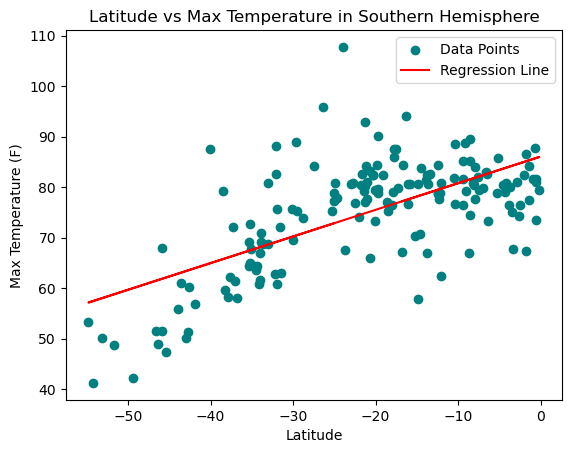

In [18]:
# Regress latitude and max temp for Southern Hemisphere
x_values = southern_hem_df['latitude']
y_values = southern_hem_df['max temp']
(slope, intercept, rvalue, pvalue,stderr) = linregress(x_values, y_values)

# Get regression values 
regress_values = x_values * slope +intercept
print(f"R-squared: {rvalue**2:.3f}")

# Plot the scatter plot
plt.scatter(x_values, y_values, color='teal', label='Data Points')

# Plot the regression line
plt.plot(x_values, regress_values, color='red', label='Regression Line')

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Latitude vs Max Temperature in Southern Hemisphere')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")
plt.legend()
plt.show()

**Discussion about the linear relationship:** 
- In the Northern Hemisphere, latitude explains nearly 73% of the variation in maximum temperatures.
- In the Southern Hemisphere, latitude is only loosely associated with maximum temperatures; with an r-squared value of 0.422, other factors may have a stronger influence on temperature.
- Temperatures appear to be highest closer to the equator.

### Latitude vs. Humidity Linear Regression Plot

R-squared: 0.135


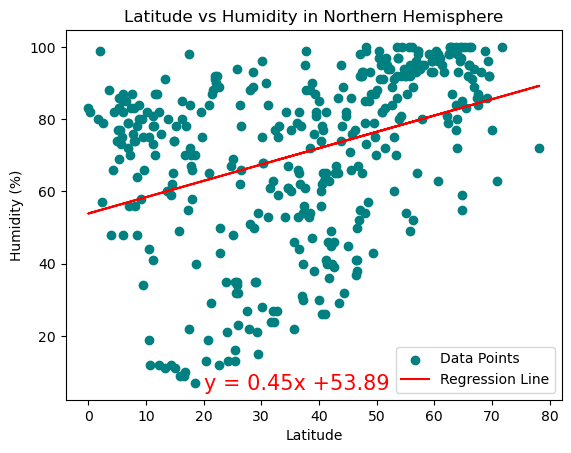

In [22]:
# Northern Hemisphere
x_values = northern_hem_df['latitude']
y_values = northern_hem_df['city humidity']
(slope, intercept, rvalue, pvalue,stderr) = linregress(x_values, y_values)

# Get regression values 
regress_values = x_values * slope +intercept
print(f"R-squared: {rvalue**2:.3f}")

# Plot the scatter plot
plt.scatter(x_values, y_values, color='teal', label='Data Points')

# Plot the regression line
plt.plot(x_values, regress_values, color='red', label='Regression Line')

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Latitude vs Humidity in Northern Hemisphere')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")
plt.legend()
plt.show()

R-squared: 0.073


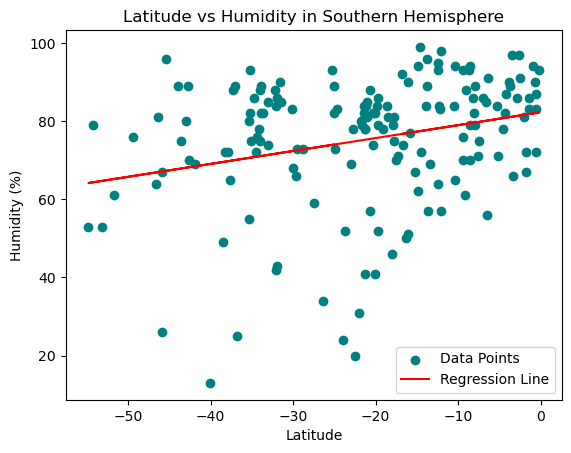

In [23]:
# Southern Hemisphere
x_values = southern_hem_df['latitude']
y_values = southern_hem_df['city humidity']
(slope, intercept, rvalue, pvalue,stderr) = linregress(x_values, y_values)

# Get regression values 
regress_values = x_values * slope +intercept
print(f"R-squared: {rvalue**2:.3f}")

# Plot the scatter plot
plt.scatter(x_values, y_values, color='teal', label='Data Points')

# Plot the regression line
plt.plot(x_values, regress_values, color='red', label='Regression Line')

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Latitude vs Humidity in Southern Hemisphere')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")
plt.legend()
plt.show()

**Discussion about the linear relationship:**
- Latitude explains only 13.5% of the variation in humidity in the Northern Hemisphere.
- Latitude explains only 0.7% of the variation in humidity in the Southern Hemisphere.

### Latitude vs. Cloudiness Linear Regression Plot

R-squared: 0.097


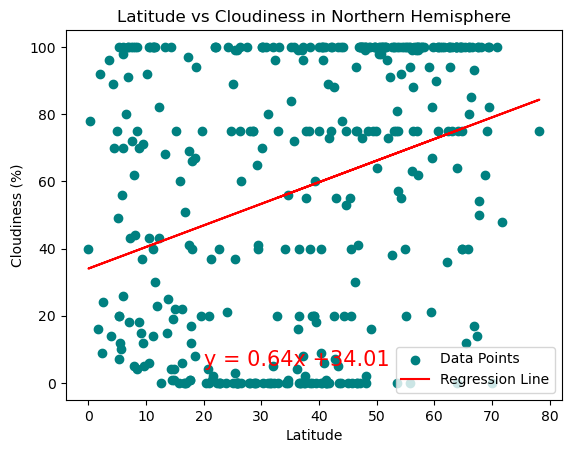

In [25]:
# Northern Hemisphere
x_values = northern_hem_df['latitude']
y_values = northern_hem_df['cloudiness']
(slope, intercept, rvalue, pvalue,stderr) = linregress(x_values, y_values)

# Get regression values 
regress_values = x_values * slope +intercept
print(f"R-squared: {rvalue**2:.3f}")

# Plot the scatter plot
plt.scatter(x_values, y_values, color='teal', label='Data Points')

# Plot the regression line
plt.plot(x_values, regress_values, color='red', label='Regression Line')

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Latitude vs Cloudiness in Northern Hemisphere')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")
plt.legend()
plt.show()

R-squared: 0.066


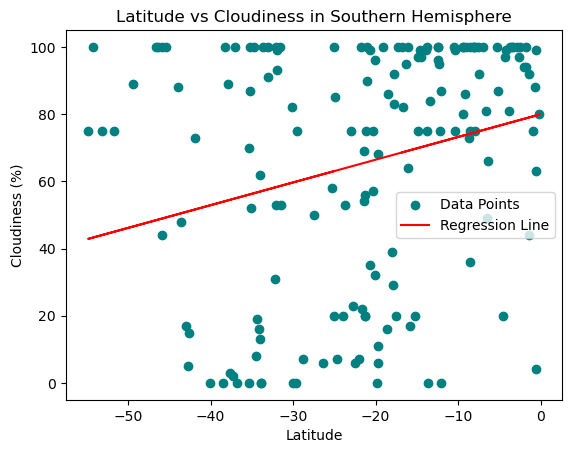

In [26]:
# Southern Hemisphere
x_values = southern_hem_df['latitude']
y_values = southern_hem_df['cloudiness']
(slope, intercept, rvalue, pvalue,stderr) = linregress(x_values, y_values)

# Get regression values 
regress_values = x_values * slope +intercept
print(f"R-squared: {rvalue**2:.3f}")

# Plot the scatter plot
plt.scatter(x_values, y_values, color='teal', label='Data Points')

# Plot the regression line
plt.plot(x_values, regress_values, color='red', label='Regression Line')

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Latitude vs Cloudiness in Southern Hemisphere')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")
plt.legend()
plt.show()

**Discussion about the linear relationship:** 
- In both the Northern and Southern Hemispheres, latitude explains less than one percent of the variation in cloudiness.

### Latitude vs. Wind Speed Linear Regression Plot

R-squared: 0.001


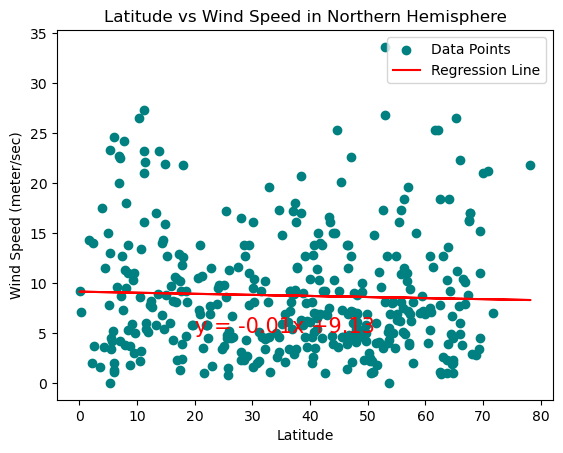

In [28]:
# Northern Hemisphere
x_values = northern_hem_df['latitude']
y_values = northern_hem_df['wind speed']
(slope, intercept, rvalue, pvalue,stderr) = linregress(x_values, y_values)

# Get regression values 
regress_values = x_values * slope +intercept
print(f"R-squared: {rvalue**2:.3f}")

# Plot the scatter plot
plt.scatter(x_values, y_values, color='teal', label='Data Points')

# Plot the regression line
plt.plot(x_values, regress_values, color='red', label='Regression Line')

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


plt.xlabel('Latitude')
plt.ylabel('Wind Speed (meter/sec)')
plt.title('Latitude vs Wind Speed in Northern Hemisphere')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")
plt.legend()
plt.show()

R-squared: 0.069


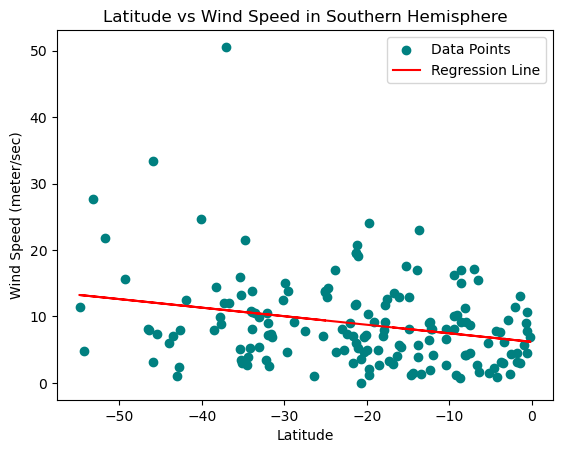

In [30]:
# Southern Hemisphere
x_values = southern_hem_df['latitude']
y_values = southern_hem_df['wind speed']
(slope, intercept, rvalue, pvalue,stderr) = linregress(x_values, y_values)

# Get regression values 
regress_values = x_values * slope +intercept
print(f"R-squared: {rvalue**2:.3f}")

# Plot the scatter plot
plt.scatter(x_values, y_values, color='teal', label='Data Points')

# Plot the regression line
plt.plot(x_values, regress_values, color='red', label='Regression Line')

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (meter/sec)')
plt.title('Latitude vs Wind Speed in Southern Hemisphere')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")
plt.legend()
plt.show()

**Discussion about the linear relationship:** 
- Latitude explains 0.1% of wind speed variation in the Northern Hemisphere.
- In the Southern Hemisphere, latitude explains nearly 7% of the variation in wind speed.